# Reading & Understanding Data

## Reading Data

In [34]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

advertising = pd.read_csv('C:/Users/MRE/Documents/GitHub/Data-Analysis-Linear-Regression/Company_data.csv')

advertising.head(-10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
185,205.0,45.1,19.6,22.6
186,139.5,2.1,26.6,10.3
187,191.1,28.7,18.2,17.3
188,286.0,13.9,3.7,20.9


## Understanding Data

In [35]:
advertising.shape

(200, 4)

In [36]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [37]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Visualizing the Data

## Pairplot Visualization

<Figure size 1440x1080 with 0 Axes>

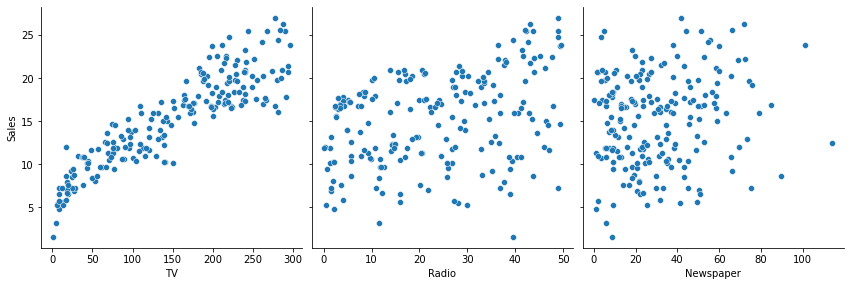

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
sns.pairplot(
    data=advertising,
    x_vars=['TV', 'Radio', 'Newspaper'],
    y_vars='Sales',
    size=4,
    aspect=1,
    kind='scatter'
)
plt.show()

# Performing Simple Linear Regression

## Creating X and Y

In [39]:
X = advertising['TV']
y = advertising['Sales']

## Creating Train and Test Split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print("X_train", X_train)
print("X_test", X_test)
print("y_train", y_train)
print("y_test", y_test)

X_train 74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64
X_test 126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
167    206.8
116    139.2
96     197.6
52     216.4
69     216.8
164    117.2
124    229.5
182     56.2
154    187.8
125     87.2
196     94.2
194    149.7
177    170.2
163    163.5
31     112.9
11     214.7
73     129.4
15     195.4
41     177.0
97     184.9
128    220.3
133    219.8
82      75.3
139    184.9
123    123.1
83      68.4
65      69.0
151    121.0
162    188.4
170     50.0
77     120.5
32      97.2
173    168.4
174    222.4
85     193.2
168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
46      89.7
75      16.9
28     248.8
29      70.6
195     38.2
40     202.5
153    171.3
115     75.1
64     131.1
59     210.7
1       44.5
192     17.2
136     25.6
152    197.6
161     85.7
Name: TV, dtype: float64

# Building & Training Model

In [41]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const    6.948683
TV       0.054546
dtype: float64

In [42]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        01:42:47   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

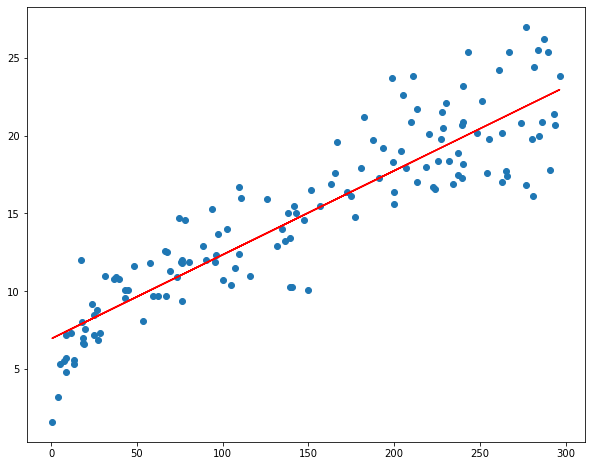

In [45]:
# Visualizing the regression line

plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Residual Analysis

## Calculating Predictions and Residuals

<Figure size 432x288 with 0 Axes>

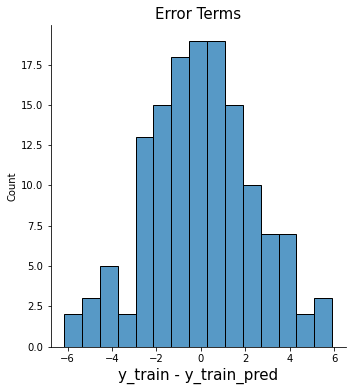

In [49]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

fig = plt.figure()
sns.displot(res, bins = 15)
plt.title("Error Terms", fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

### Scatter Plot of Residuals

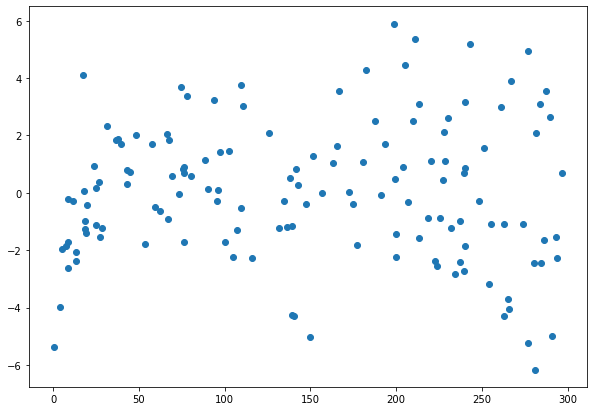

In [50]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, res)
plt.show()

# Predictions on the Test Set

## Making Predictions on the Test Set

In [51]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr.predict(X_test_sm)

y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

## Evaluating Model Performance on the Test Set

In [52]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7921031601245657

## Visualizing Predictions vs Actual Values

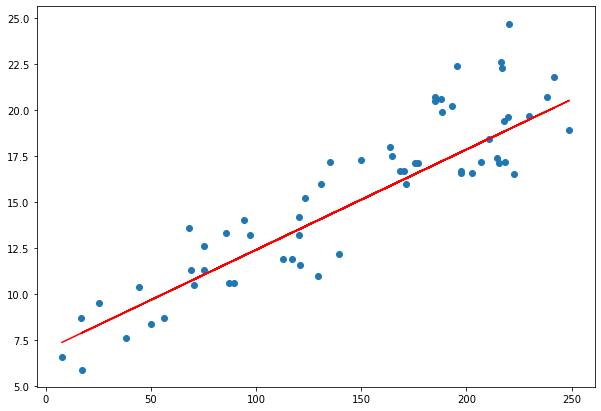

In [53]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Building Regression Model Using SkLearn

In [54]:
from sklearn.model_selection import train_test_split

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train_lm", X_train_lm.shape)
print("X_test_lm", X_test_lm.shape)
print("y_train_lm", y_train_lm.shape)
print("y_test_lm", y_test_lm.shape)

X_train_lm (140,)
X_test_lm (60,)
y_train_lm (140,)
y_test_lm (60,)


In [55]:
# Adding additional column

X_train_lm = X_train_lm.values.reshape(-1, 1)
X_test_lm = X_test_lm.values.reshape(-1, 1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [56]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train_lm, y_train_lm)

print("Intercept Value", lm.intercept_)
print("Slope", lm.coef_)

Intercept Value 6.94868320000136
Slope [0.05454575]


# Prediction

In [58]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

#Comparing the R^2 Score
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8157933136480388
0.792103160124566
